#### load libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


#### declare arguments

In [45]:
ppagecat = {1:'18-24',2:'25-34',3:'35-44',4:'45-54',5:'55-64',6:'65-74',7:'75+',99:'Under 18'}
ppeducat = {-2:'Not asked',-1:'REFUSED'
            ,1:'Less than high school'
            ,2:'High school'
            ,3:'Some college'
            ,4:'Bachelor\'s degree or higher'}
ppgender = {-2:'Not asked',-1:'REFUSED',1:'Male',2:'Female'}
ppincimp = {-2:'Not asked',-1:'REFUSED'
            ,1 :'<$5,000'
            ,2 :'$5,000 to $7,499'
            ,3 :'$7,500 to $9,999'
            ,4 :'$10,000 to $12,499'
            ,5 :'$12,500 to $14,999'
            ,6 :'$15,000 to $19,999'
            ,7 :'$20,000 to $24,999'
            ,8 :'$25,000 to $29,999'
            ,9 :'$30,000 to $34,999'
            ,10: '$35,000 to $39,999'
            ,11: '$40,000 to $49,999'
            ,12: '$50,000 to $59,999'
            ,13: '$60,000 to $74,999'
            ,14: '$75,000 to $84,999'
            ,15: '$85,000 to $99,999'
            ,16: '$100,000 to $124,999'
            ,17: '$125,000 to $149,999'
            ,18: '$150,000 to $174,999'
            ,19: '>=$175,000'}
ppmarit =  {-2: 'Not asked'
            ,-1: 'REFUSED'
            ,1 :'Married'
            ,2 :'Widowed'
            ,3 :'Divorced'
            ,4 :'Separated'
            ,5: 'Never married'
            ,6: 'Living with partner'}
ppreg9 = {1: 'New England'
            ,2: 'Mid-Atlantic'
            ,3: 'East-North Central'
            ,4: 'West-North Central' 
            ,5: 'South Atlantic'
            ,6: 'East-South Central' 
            ,7: 'West-South Central'
            ,8: 'Mountain'
            ,9: 'Pacific'}

#### parse data

In [39]:
surveys = pd.read_csv('MMdata_merged.csv')
surveys.head()

,CaseID,weight,tm_start,tm_finish,duration,C1,C2,C3,I1,I2,...,pppa0097,pppa0098,pppa0099,pppa0100,pppa0101,pppa0102,partyid7,pppa0005,pppa0006,ppp20072
0,2,1.05,3/10/2012,3/10/2012,46,3,3,3,2,3,...,0,0,0,0,0,0,3,1,2,5
1,3,2.60,3/10/2012,3/10/2012,39,4,2,3,1,2,...,0,0,0,0,1,0,5,1,1,5
2,4,0.69,3/10/2012,3/11/2012,1453,3,3,4,4,3,...,0,0,0,0,0,0,2,1,2,1
3,5,1.74,3/10/2012,3/10/2012,45,5,1,4,3,3,...,1,0,0,0,1,0,7,1,1,5
4,6,2.43,3/10/2012,3/10/2012,26,4,4,4,2,2,...,0,0,0,0,0,0,7,1,1,6


In [40]:
surveys.shape

(1519, 451)

In [41]:
new_surveys = pd.DataFrame(surveys[['weight','tm_start','tm_finish','duration']],index=surveys['CaseID'])

In [46]:
new_surveys['age_category'] = surveys['ppagecat'].apply(lambda x: ppagecat[x])
new_surveys['education_level'] = surveys['PPEDUCAT'].apply(lambda x: ppeducat[x])
new_surveys['gender'] = surveys['PPGENDER'].apply(lambda x: ppgender[x])
new_surveys['income_level'] = surveys['PPINCIMP'].apply(lambda x: ppincimp[x])
new_surveys['marital_status'] = surveys['PPMARIT'].apply(lambda x: ppmarit[x])
new_surveys['region'] = surveys['ppreg9'].apply(lambda x: ppreg9[x])

In [47]:
new_surveys.head()

,weight,tm_start,tm_finish,duration,age_category,education_level,gender,income_level,marital_status,region
CaseID,,,,,,,,,,
2,0.69,3/10/2012,3/11/2012,1453,25-34,High school,Female,"$12,500 to $14,999",Married,Pacific
3,1.74,3/10/2012,3/10/2012,45,35-44,Bachelor's degree or higher,Female,">=$175,000",Married,South Atlantic
4,2.43,3/10/2012,3/10/2012,26,35-44,Some college,Female,"$75,000 to $84,999",Never married,Mountain
5,2.72,3/10/2012,3/10/2012,25,35-44,Bachelor's degree or higher,Female,"$75,000 to $84,999",Married,East-North Central
6,0.42,3/10/2012,3/10/2012,207,45-54,Some college,Female,"$50,000 to $59,999",Married,East-North Central


#### show data slices

/Library/Python/2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


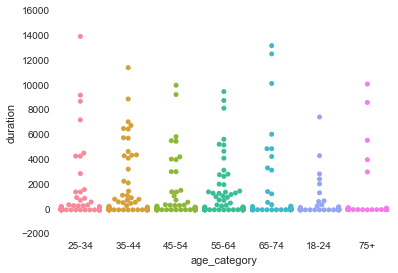

In [44]:
sns.swarmplot(x="age_category", y="duration", data=new_surveys);

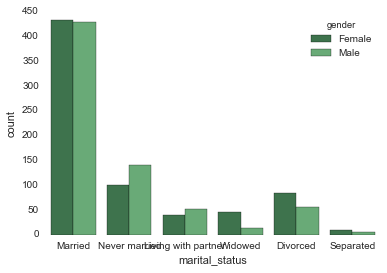

In [48]:
sns.countplot(x="marital_status", hue="gender", data=new_surveys, palette="Greens_d");